라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

작품 선택하기

In [334]:
# vtt 파일들
# /Movie/Ben Platt Live From Radio City Music Hall/Ben.Platt.Live.from.Radio.City.Music.Hall.WEBRip.Netflix.en[cc].vtt
# /Movie/Inception/Inception.WEBRip.Netflix.en[cc].vtt
# /Movie/Klaus/Klaus.WEBRip.Netflix.en[cc].vtt
# /Movie/Monty Python And The Holy Grail/Monty.Python.and.the.Holy.Grail.WEBRip.Netflix.en[cc].vtt
# /Movie/The Boy In The Striped Pajamas/The.Boy.in.the.Striped.Pajamas.WEBRip.Netflix.en[cc].vtt
# /Movie/The Departed/The.Departed.WEBRip.Netflix.en[cc].vtt
# /Movie/There Will Be Blood/There.Will.Be.Blood.WEBRip.Netflix.en[cc].vtt

In [2]:
#Drama
Drama = ['Breaking Bad', 'Friends', 'Game of Thrones', 'Greys Anatomy', 'Modern Family', 'Sherlock', 'The Big Bang Theory', 'The Good Place']
Movie = ['Ben Platt Live From Radio City Music Hall', 'Inception', 'Klaus', 'Men In Black', 'Moneyball', 'Monty Python And The Holy Grail', 'The Boy In The Striped Pajamas', 'The Departed', 'The Intern', 'There Will Be Blood', 'Zootopia']

## 여기서 작품 선택합니다 꼭!!

In [6]:
title = Movie[9] # 여기서 작품 선택

# 파일명 확정되면 수정
if title in Drama:
    path = '../Script/Drama'
    file_name = title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'Ben.Platt.Live.from.Radio.City.Music.Hall.WEBRip.Netflix.en[cc]'
else:
    path = '../Script/Movie'
    file_name = title.replace(' ', '.') + '.WEBRip.Netflix.en[cc]'
    # file_name = 'There.Will.Be.Blood.WEBRip.Netflix.en[cc]'

파일 불러오기

In [8]:
movie_data = pd.read_csv(f'{path}/{title}/{file_name}.csv')

In [9]:
movie = movie_data

데이터 정보

In [10]:
movie.info()
movie.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     2689 non-null   int64 
 1   start   2689 non-null   object
 2   end     2689 non-null   object
 3   script  2689 non-null   object
dtypes: int64(1), object(3)
memory usage: 84.2+ KB


,num,start,end,script
0,8,00:04:45.869,00:04:47.495,['Oh!']
1,10,00:04:53.252,00:04:55.254,['No!']
2,13,00:05:13.981,00:05:16.108,['No!']
3,15,00:05:28.870,00:05:30.122,"['There', 'she', 'is.']"
4,16,00:05:30.122,00:05:31.456,"['There', 'she', 'is.']"
5,21,00:05:40.215,00:05:41.883,"['There', 'she', 'is.']"
6,42,00:14:30.203,00:14:32.455,['DANIEL:']
7,43,00:14:30.203,00:14:32.455,"['Ladies', 'and', 'gentlemen,']"
8,44,00:14:32.455,00:14:36.209,"[""I've"", 'traveled', 'over', 'half']"
9,45,00:14:32.455,00:14:36.209,"['our', 'state', 'to', 'be', 'here', 'tonight.']"


DataFrame -> text

In [12]:
list_movie = []
list_movie.extend(data for data in movie['script'])
# len(list_movie)
# list_movie[:10]
text_movie = ' '.join(list_movie)
text_movie[:500]

'[\'Oh!\'] [\'No!\'] [\'No!\'] [\'There\', \'she\', \'is.\'] [\'There\', \'she\', \'is.\'] [\'There\', \'she\', \'is.\'] [\'DANIEL:\'] [\'Ladies\', \'and\', \'gentlemen,\'] ["I\'ve", \'traveled\', \'over\', \'half\'] [\'our\', \'state\', \'to\', \'be\', \'here\', \'tonight.\'] [\'I\', "couldn\'t", \'get\', \'away\', \'sooner\'] [\'because\', \'my\', \'new\', \'well\'] [\'was\', \'coming\', \'in\', \'at\', \'Coyote\', \'Hills,\'] [\'and\', \'I\', \'had\', \'to\', \'see\', \'about\', \'it.\'] [\'That\', \'well\', \'is\', \'now\', \'flowing\'] [\'at\', \'2,000\', \'barrels,\'] [\'and\', "it\'s", \'paying\', \'me\''

영문자 이외 문자는 공백으로 변환

In [14]:
import re
 
# 영문자 이외 문자는 공백으로 변환
only_english_movie = re.sub('[^a-zA-Z]', ' ', text_movie)
only_english_movie[:500]

'  Oh      No      No      There    she    is      There    she    is      There    she    is      DANIEL      Ladies    and    gentlemen      I ve    traveled    over    half     our    state    to    be    here    tonight      I    couldn t    get    away    sooner     because    my    new    well     was    coming    in    at    Coyote    Hills      and    I    had    to    see    about    it      That    well    is    now    flowing     at             barrels      and    it s    paying    me '

소문자로 변환

In [19]:
	# 소문자 변환
no_capitals_movie = only_english_movie.lower().split()
print(len(no_capitals_movie), '\n', no_capitals_movie[:50])

10162 
 ['oh', 'no', 'no', 'there', 'she', 'is', 'there', 'she', 'is', 'there', 'she', 'is', 'daniel', 'ladies', 'and', 'gentlemen', 'i', 've', 'traveled', 'over', 'half', 'our', 'state', 'to', 'be', 'here', 'tonight', 'i', 'couldn', 't', 'get', 'away', 'sooner', 'because', 'my', 'new', 'well', 'was', 'coming', 'in', 'at', 'coyote', 'hills', 'and', 'i', 'had', 'to', 'see', 'about', 'it']


# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [343]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [20]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NSK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_movie = [word for word in no_capitals_movie if not word in stops]
len(no_stops_movie)

4309

list -> DataFrame

In [22]:
df_movie = pd.DataFrame(no_stops_movie)
result_movie = pd.DataFrame(df_movie.value_counts())
result_movie = result_movie.rename_axis('words').rename(columns={0: 'counts'})
result_movie

,counts
words,
daniel,97
yes,66
eli,56
well,52
get,48
...,...
contracts,1
mission,1
misstep,1


파일로 저장

In [23]:
result_movie.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

저장한 파일 확인

In [24]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data

,words,counts
0,daniel,97
1,yes,66
2,eli,56
3,well,52
4,get,48
...,...,...
1180,contracts,1
1181,mission,1
1182,misstep,1
1183,mistakes,1


정제된 대본 데이터 불러오기

In [25]:
data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   1185 non-null   object
 1   counts  1185 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.6+ KB


,words,counts
0,daniel,97
1,yes,66
2,eli,56
3,well,52
4,get,48
...,...,...
1180,contracts,1
1181,mission,1
1182,misstep,1
1183,mistakes,1


기준 단어 데이터 불러오기

In [27]:
path = '../'
words = pd.read_csv(f'{path}/words/word - AllLevels.csv')
words

,word,level
0,1.0,TRUE
1,1.0,zero
2,1.0,young
3,1.0,you
4,1.0,yet
...,...,...
24836,NaN,vaunted
24837,NaN,vehemence
24838,NaN,victimizer
24839,NaN,washout


단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [28]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'words'})
words

,level,words
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [29]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1184
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1185 non-null   object 
 1   counts  1185 non-null   int64  
 2   level   805 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.0+ KB


,words,counts,level
0,daniel,97,0
1,yes,66,1
2,eli,56,0
3,well,52,1
4,get,48,1
...,...,...,...
1180,contracts,1,0
1181,mission,1,2
1182,misstep,1,999
1183,mistakes,1,0


result 데이터 프레임 생성

In [30]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,426
0,380
999,175
2,120
3,35
4,30
5,19


In [31]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,380,32.067511
1,1,426,35.949367
2,2,120,10.126582
3,3,35,2.953586
4,4,30,2.531646
5,5,19,1.603376
6,999,175,14.767932


<AxesSubplot:xlabel='level'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


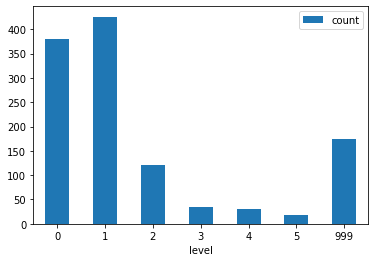

In [32]:
result.plot(x='level', y='count', kind='bar', rot=0)

단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [33]:
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [34]:
matched_data

,words,counts,level,matched
0,daniel,97,0,False
1,yes,66,1,True
2,eli,56,0,False
3,well,52,1,True
4,get,48,1,True
...,...,...,...,...
1180,contracts,1,0,False
1181,mission,1,2,True
1182,misstep,1,999,True
1183,mistakes,1,0,False


In [35]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1184
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1185 non-null   object 
 1   counts  1185 non-null   int64  
 2   level   805 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.0+ KB


,words,counts,level
1,yes,66,1
3,well,52,1
4,get,48,1
5,man,47,1
6,like,47,1
...,...,...,...
1172,country,1,1
1176,corn,1,4
1178,miracle,1,4
1179,miserable,1,4


In [36]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,426
2,120
3,35
4,30
5,19


In [37]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,1,426,67.619048
1,2,120,19.047619
2,3,35,5.555556
3,4,30,4.761905
4,5,19,3.015873


<AxesSubplot:xlabel='level'>

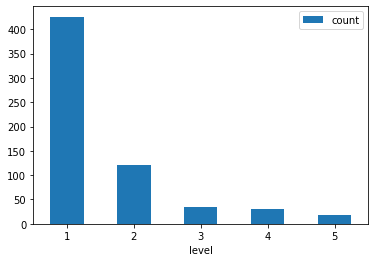

In [38]:

result.plot(x='level', y='count', kind='bar', rot=0)